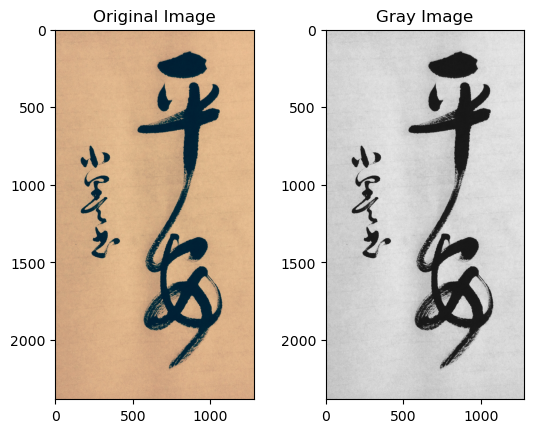

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('shufa.jpg')  # 读取彩色图像
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 转换颜色通道顺序为RGB

# 将彩色图像转换为灰度图像
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 显示原图和灰度图
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gray_img,cmap='gray')
plt.title('Gray Image')

plt.show()


[0 0 0 ... 0 0 0]


([], [])

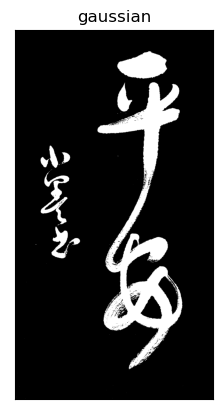

In [2]:
#change img(2D) to 1D
#为了要使用GMM聚类，所以先把二维数据转为一维数据
from sklearn.mixture import GaussianMixture


img_1D = gray_img.reshape((gray_img.shape[0] * gray_img.shape[1],1))
img_1D = np.float32(img_1D)


gmm = GaussianMixture(n_components=2, random_state=0)

label = gmm.fit_predict(img_1D)
print(label)

# output the graph after clustering
img_cluster = label.reshape((gray_img.shape[0],gray_img.shape[1]))
plt.subplot(122)
plt.imshow(img_cluster,'gray')
plt.title('gaussian')
plt.xticks([])
plt.yticks([])


[[[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 ...

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]]
(2383, 1280, 1)


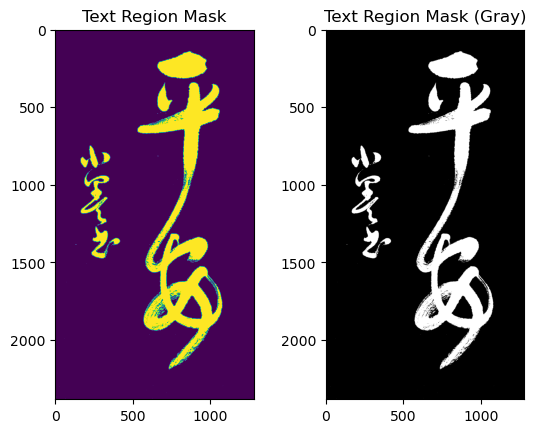

In [3]:
# 标记文本区域
text_label = 1  # 假设文本所在的聚类标签是1
text_mask = (label == text_label).reshape(gray_img.shape[0], gray_img.shape[1], 1)
print(text_mask)
print(text_mask.shape)

plt.subplot(1, 2, 1)
plt.imshow(text_mask)
plt.title('Text Region Mask')

plt.subplot(1, 2, 2)
plt.imshow(text_mask[:, :, 0], 'gray')  # 选择第一个通道显示灰度图像
plt.title('Text Region Mask (Gray)')

plt.show()

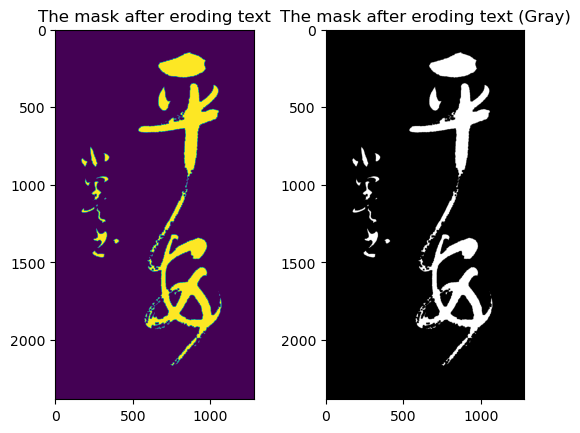

In [4]:
# 腐蚀操作
kernel = np.ones((3, 3), np.uint8)
eroded_text_mask = cv2.erode(text_mask.astype(np.uint8), kernel, iterations=5)

plt.subplot(1, 2, 1)
plt.imshow(eroded_text_mask)
plt.title('The mask after eroding text')

plt.subplot(1, 2, 2)
plt.imshow(eroded_text_mask, 'gray')
plt.title('The mask after eroding text (Gray)')

plt.show()
